# Import Libraries

Rreference:
- https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
# Loading the dataset
dataset = pd.read_csv('Data/DC_Prop_Condominium_Clustering.csv', index_col= 'Unnamed: 0')
dataset = dataset.reset_index()

In [ ]:
dataset.shape

(40316, 20)

In [ ]:
dataset.head()

index  BATHRM  HF_BATHRM  HEAT  AC  ROOMS  BEDRM     AYB  YR_RMDL   EYB  \
0      0       2          0     2   1      4      2  1911.0   2016.0  1919   
1      1       2          0     2   1      4      2  1911.0   2016.0  1919   
2      2       2          0     2   1      4      2  1911.0   2016.0  1919   
3      3       2          0     2   1      4      2  1911.0   2016.0  1919   
4      4       2          0     2   1      4      2  1911.0   2016.0  1919   

      PRICE  QUALIFIED  SALE_NUM  FIREPLACES  USECODE  LANDAREA  LIVING_GBA  \
0  599900.0          0         2           0       16       716      1084.0   
1  677900.0          1         2           0       16       844      1267.0   
2  659900.0          1         2           0       16       763      1151.0   
3  645000.0          1         2           0       16       716      1080.0   
4  690900.0          0         2           0       16       923      1405.0   

   WARD  SalevYB  SalevYI  
0     0    105.0       97  
1     0    106.0       98  
2     0    105.0       97  
3     0    105.0       97  
4     0    106.0       98

In [ ]:
data = 'BATHRM', 'LANDAREA', 'YR_RMDL', 'USECODE', 'EYB', 'LIVING_GBA', 'SalevYB', 'AYB', 'PRICE'

X = dataset.loc[:2000, data].values

In [ ]:
X.shape

(2001, 9)

# Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)
# Ekstrak informasi


score_kemans_s = silhouette_score(X, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans.labels_)
score_kemans_d = davies_bouldin_score(X, predictions)
score_kemans_i = kmeans.inertia_
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print(f'Inrtia = {score_kemans_i:.4f}')

Silhouette Score: 0.6677
Calinski Harabasz Score: 4611.1489
Davies Bouldin Score: 0.4521
Inrtia = 45534235191786.4922


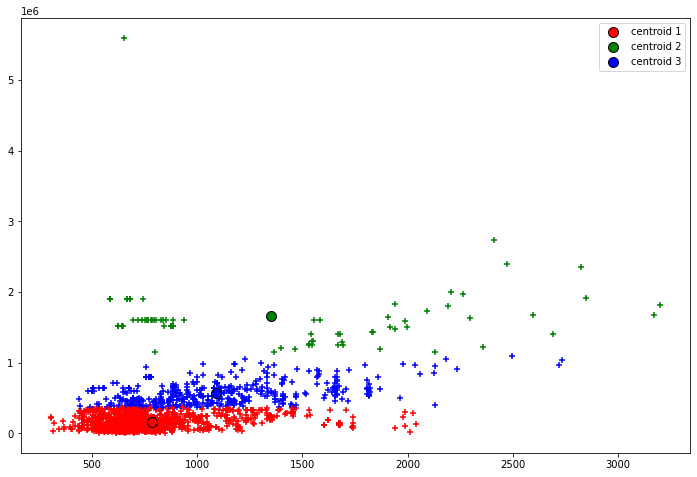

In [ ]:
c_sklearn = kmeans.labels_
new_z_sklearn = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
for i in range(len(c_sklearn)):
    if c_sklearn[i] == 0:
        plt.scatter(X[i,5], X[i,8], c='r', marker='+')
    elif c_sklearn[i] == 1:
        plt.scatter(X[i,5], X[i,8], c='g', marker='+')
    else:
        plt.scatter(X[i,5], X[i,8], c='b', marker='+')

plt.scatter(new_z_sklearn[0,5], new_z_sklearn[0,8], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(new_z_sklearn[1,5], new_z_sklearn[1,8], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(new_z_sklearn[2,5], new_z_sklearn[2,8], c='b', edgecolor='k', s=100, label='centroid 3')


plt.legend()
plt.show()


# Agglomerative

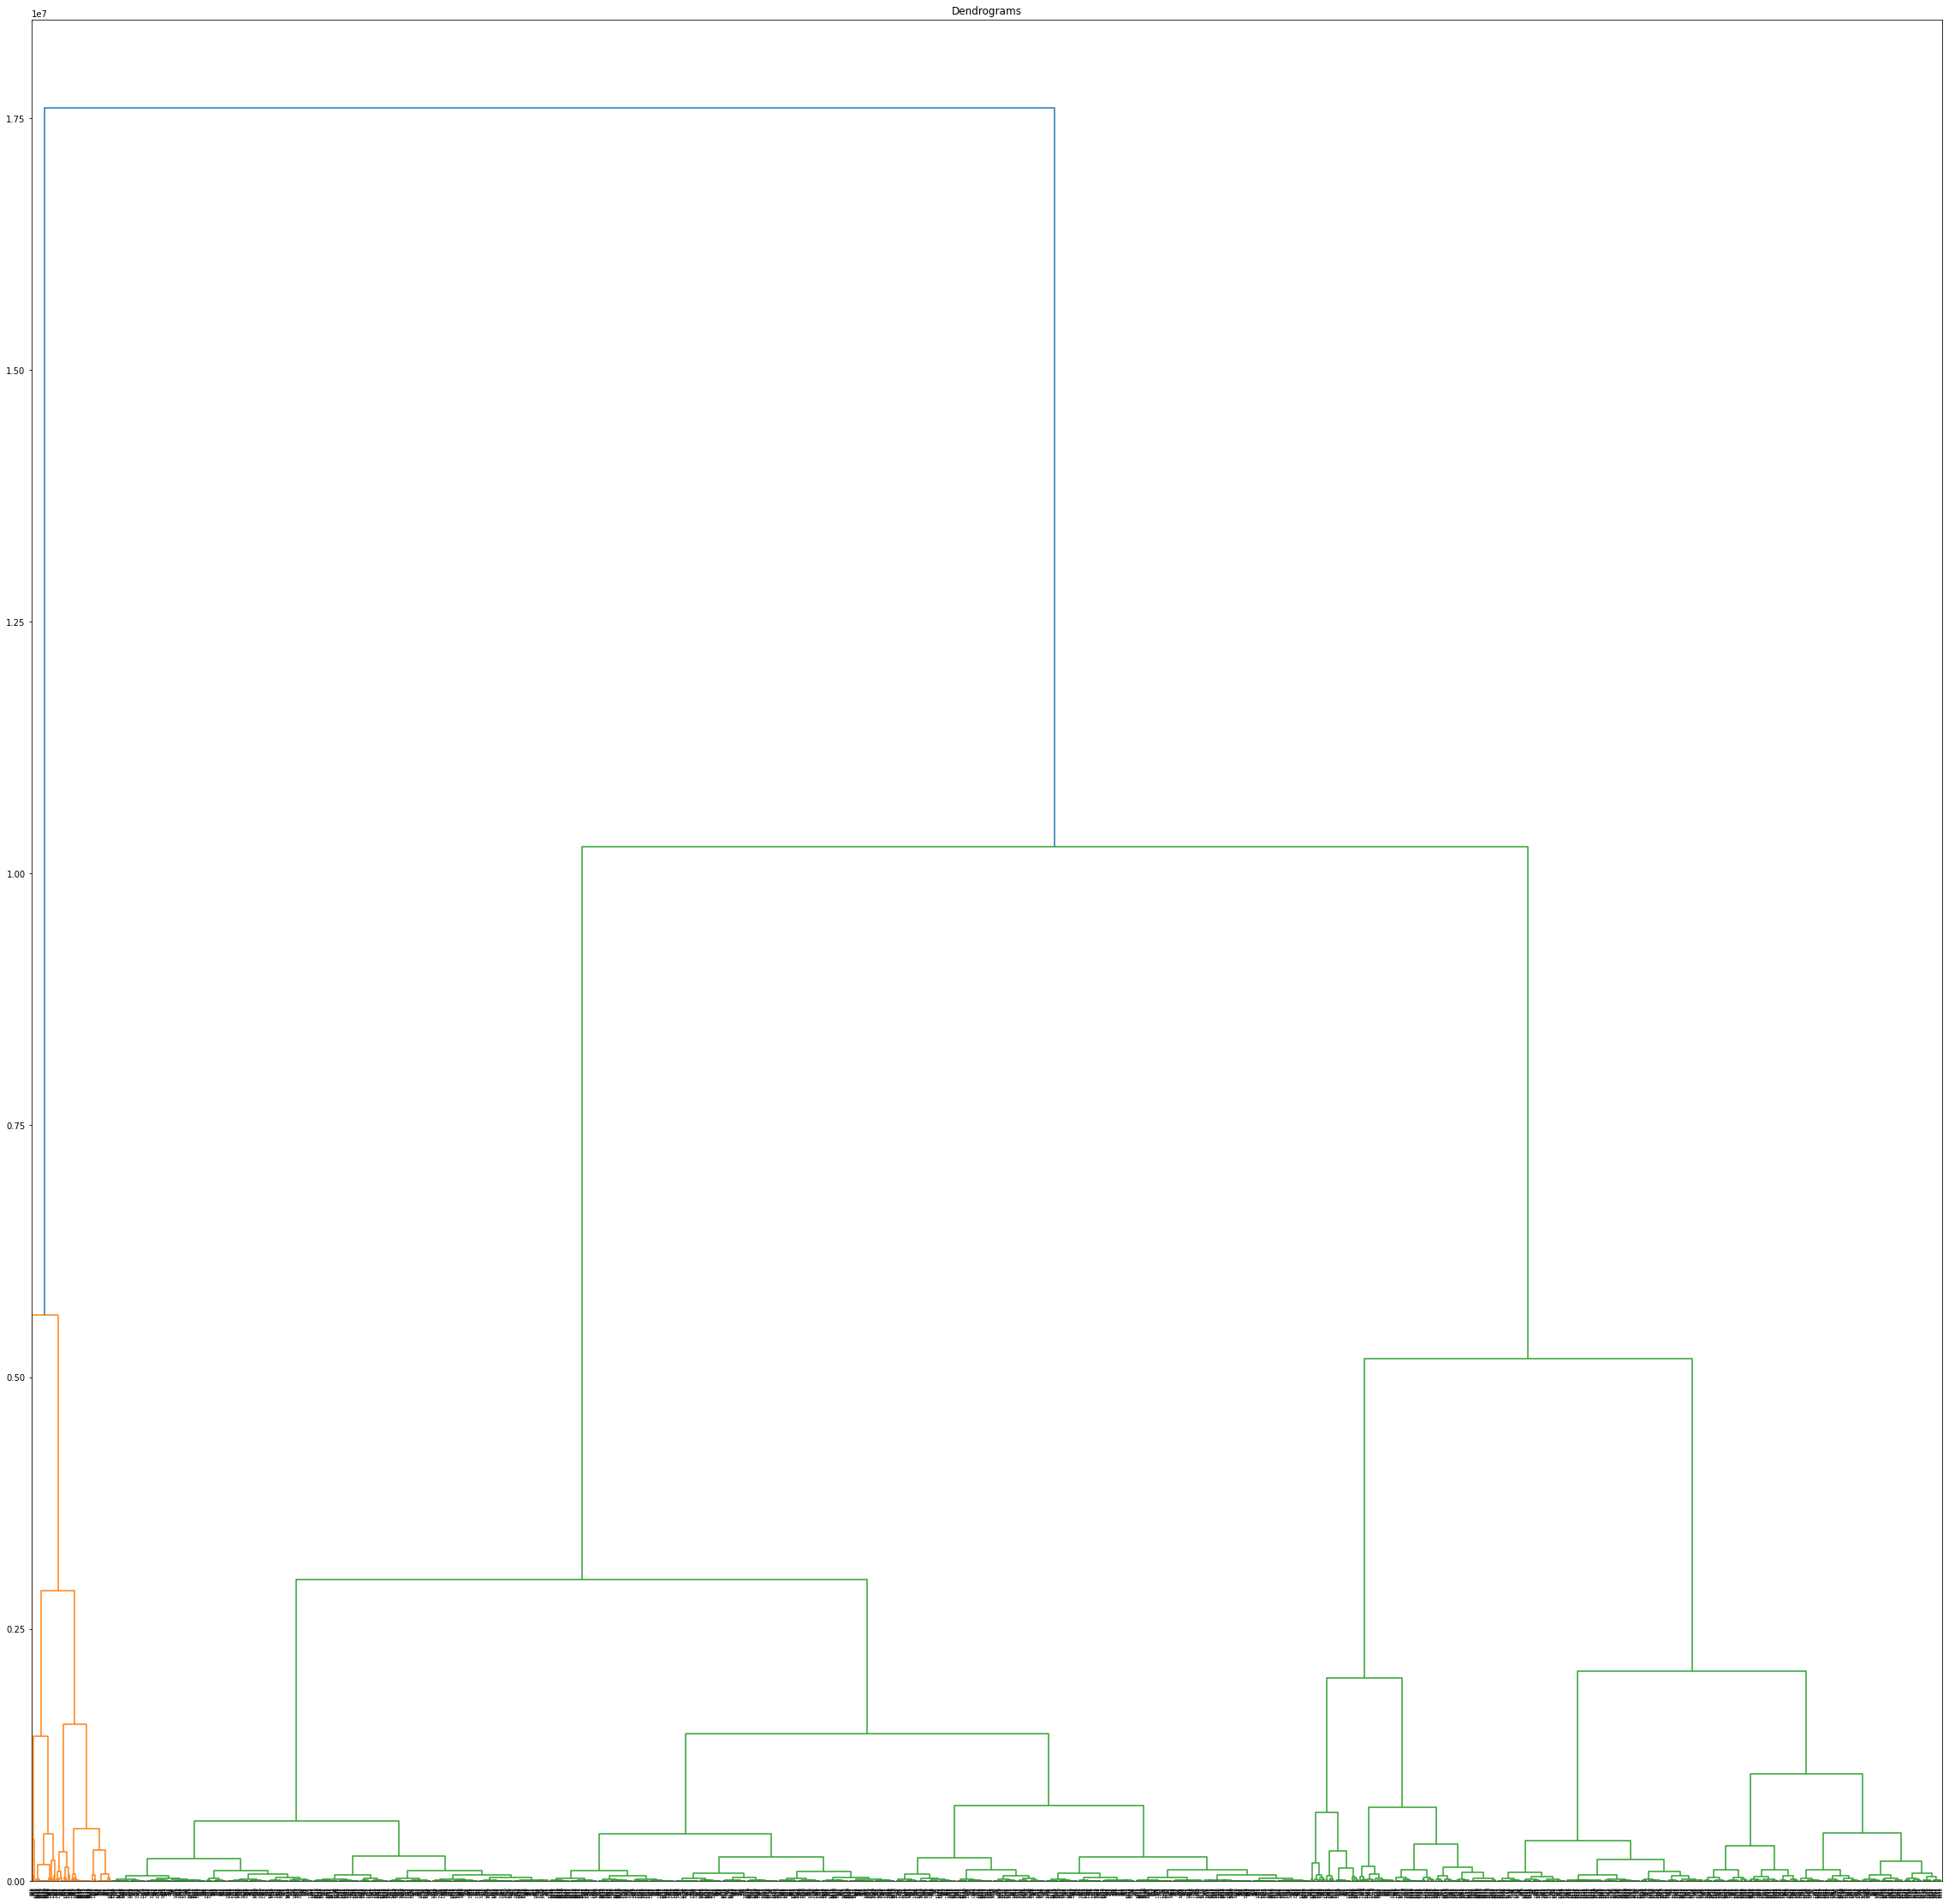

In [ ]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(40,40))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.6258
Calinski Harabasz Score: 4592.2298
Davies Bouldin Score: 0.3785


# Gaussian Mixture Modelling (GMM)

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 3,covariance_type= "full", random_state = 10)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.5499
Calinski Harabasz Score: 374.4068
Davies Bouldin Score: 3.7613
